<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

_Authors: Joseph Nelson (DC)_

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# web location:
local_csv = './NHL_Data_GA.csv'

### 1. Load the NHL data

In [9]:
nhl = pd.read_csv(local_csv)
nhl.describe()
nhl.shape

(90, 28)

### 2. Perform any required data cleaning. Do some EDA.

In [6]:
nhl.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


### 3. Set up the `Rank` variable as your target. How many classes are there?

In [19]:
nhl.Rank.value_counts()

3    31
2    30
1    29
Name: Rank, dtype: int64

### 4. What is the baseline accuracy?

In [20]:
# A: Assume the most commmon class (3) is the rank for all teams, therefore your baseline accuracy is:

31/90

0.34444444444444444

### 5. Choose 4 features to be your predictor variables and set up your design matrix.

In [22]:
feature_cols = ['PTS','GF','GA','Sv%']
X = nhl[feature_cols]
y = nhl.Rank

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=123)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train);
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test,y_pred_class)))

0.8260869565217391


### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [9]:
#It's much better than the baseline, and I would think legitimate given
#the high correlation of the feature columns to the rank.


### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=123)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train);
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test,y_pred_class)))

0.8


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=123)
knn = KNeighborsClassifier(n_neighbors=67)
knn.fit(X_train,y_train);
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test,y_pred_class)))

0.17391304347826086


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [38]:
scores = []
for k in range(1,68):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred_class)
    scores.append([k,score])

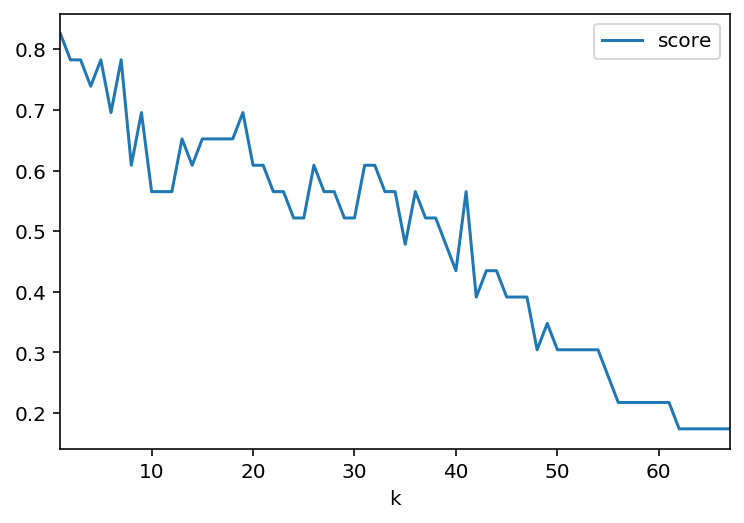

In [40]:
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

In [13]:
# A:

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [14]:
# A: